# Import StatsLibX

## pip install statslibx

In [1]:
import statslibx as slx
slx.welcome()

KeyboardInterrupt: 

## Imports

In [ ]:
import statslibx as slx
from statslibx.datasets import load_dataset
from statslibx.preprocessing import Preprocessing
from statslibx import DescriptiveStats, InferentialStats, UtilsStats

## StatsLibX.datasets

In [ ]:
from statslibx.datasets import load_dataset

In [ ]:
load_dataset("iris.csv") # Import a dataset from the package

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X, y = load_dataset(
        name="iris.csv", 
        return_X_y=(["sepal_length", "sepal_width"], "petal_width")
        )

# Show first 5 elements for Machine Learning 
print("Array X: ",X[0:5])
print("Array y: ",y[0:5])

Array X:  [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Array y:  [0.2 0.2 0.2 0.2 0.2]


In [ ]:
# For simplyfication
from statslibx.datasets import load_iris, load_penguins
iris = load_iris()
penguins = load_penguins()
print("Iris: \n", iris.head())
print("Penguins: \n", penguins.head())


Iris: 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Penguins: 
   species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]


## StatsLibX.preprocessing

In [ ]:
from statslibx.preprocessing import Preprocessing
from statslibx.datasets import load_iris

In [ ]:
# For work with this package, we will use penguins dataset
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Create a preprocessing object
preprocessing = Preprocessing(df)

In [ ]:
# Detect nulls
preprocessing.detect_nulls()

,column,nulls,non_nulls,null_pct
0,species,0,344,0.000000
1,island,0,344,0.000000
2,bill_length_mm,2,342,0.005814
3,bill_depth_mm,2,342,0.005814
4,flipper_length_mm,2,342,0.005814
5,body_mass_g,2,342,0.005814
6,sex,11,333,0.031977


In [ ]:
# Detect uniqueness
preprocessing.check_uniqueness()

,column,unique_values
0,species,3
1,island,3
2,bill_length_mm,164
3,bill_depth_mm,80
4,flipper_length_mm,55
5,body_mass_g,94
6,sex,2


In [ ]:
# Preview data
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Describe numeric
preprocessing.describe_numeric()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# Describe categorical
preprocessing.describe_categorical()

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,168


In [ ]:
# Fill nulls
preprocessing.fill_nulls(
                fill_with=0,
                columns=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"] 
            )
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)

In [ ]:
# Normalize
preprocessing.normalize(
                column=[    
                    "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
            )
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


In [ ]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)

In [ ]:
# Standarize
preprocessing.standardize(
                column=[    
                    "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
            )
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.883205,0.784300,-1.416272,-0.563317,MALE
1,Adelie,Torgersen,-0.809939,0.126003,-1.060696,-0.500969,FEMALE
2,Adelie,Torgersen,-0.663408,0.429833,-0.420660,-1.186793,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,-1.322799,1.088129,-0.562890,-0.937403,FEMALE


In [ ]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)

In [ ]:
# Filter rows
condition = (preprocessing.data["species"] == "Adelie") & (preprocessing.data["bill_length_mm"] > 40)
preprocessing.filter_rows(condition=condition)
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE


In [ ]:
# Filter columns
preprocessing.filter_columns(columns=["species", "bill_length_mm", "bill_depth_mm"])
preprocessing.preview_data()

,species,bill_length_mm,bill_depth_mm
2,Adelie,40.3,18.0
9,Adelie,42.0,20.2
12,Adelie,41.1,17.6
17,Adelie,42.5,20.7
19,Adelie,46.0,21.5


In [ ]:
# Rename columns
preprocessing.rename_columns(mapping={"bill_length_mm": "bill_length"})
preprocessing.preview_data()

,species,bill_length,bill_depth_mm
2,Adelie,40.3,18.0
9,Adelie,42.0,20.2
12,Adelie,41.1,17.6
17,Adelie,42.5,20.7
19,Adelie,46.0,21.5


In [ ]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Detect Outliers
preprocessing.detect_outliers(column="body_mass_g")

No outliers found in column 'body_mass_g'


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
# Data Quality
preprocessing.data_quality()

,column,dtype,nulls,null_pct,unique_values,completeness_pct
0,species,object,0,0.000000,3,1.000000
1,island,object,0,0.000000,3,1.000000
2,bill_length_mm,float64,2,0.005814,164,0.994186
3,bill_depth_mm,float64,2,0.005814,80,0.994186
4,flipper_length_mm,float64,2,0.005814,55,0.994186
5,body_mass_g,float64,2,0.005814,94,0.994186
6,sex,object,11,0.031977,2,0.968023


## StatsLibX. Descriptive

In [ ]:
from statslibx import DescriptiveStats

In [ ]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Create a DescriptiveStats object
ds = DescriptiveStats(df)

In [ ]:
# Calculate mean, median, mode, variance, std, skewness, kurtosis, quantiles 
print("Mean: \n", ds.mean())
print("-"*40)
print("Median: \n", ds.median())
print("-"*40)
print("Mode: \n", ds.mode())
print("-"*40)
print("Variance: \n", ds.variance())
print("-"*40)
print("Standard Deviation: \n", ds.std())
print("-"*40)
print("Skewness: \n", ds.skewness())
print("-"*40)
print("Kurtosis: \n", ds.kurtosis())
print("-"*40)
print("Quantiles: \n", ds.quantile(q=[0.25, 0.5, 0.75]))

Mean: 
 bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64
----------------------------------------
Median: 
 bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64
----------------------------------------
Mode: 
 bill_length_mm         41.1
bill_depth_mm          17.0
flipper_length_mm     190.0
body_mass_g          3800.0
Name: 0, dtype: float64
----------------------------------------
Variance: 
 bill_length_mm           29.807054
bill_depth_mm             3.899808
flipper_length_mm       197.731792
body_mass_g          643131.077327
dtype: float64
----------------------------------------
Standard Deviation: 
 bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64
----------------------------------------
Skewness: 
 bill_length

In [ ]:
# Outliers
# Default Threshold = 1.5
# Just for this example we will set the threshold to 0.1
outliers = ds.outliers(column="body_mass_g", threshold=0.1)
print("Outliers: ", outliers.sum())

Outliers:  137


In [ ]:
# Correlation
ds.correlation()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [ ]:
# Covarianza
ds.covariance()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [ ]:
# Summary
ds.summary()

                                 RESUMEN DE ESTADÍSTICA DESCRIPTIVA                                 
Fecha: 2026-01-18 15:40:12
Variables analizadas: 4
----------------------------------------------------------------------------------------------------

                                      VARIABLE: bill_length_mm                                      
----------------------------------------------------------------------------------------------------

Medidas de Tendencia Central:
  Conteo                                                  342
  Media                                             43.921930
  Mediana                                           44.450000
  Moda                                              41.100000

Medidas de Dispersión:
  Desviación Estándar                                5.459584
  Varianza                                          29.807054
  Rango Intercuartílico (IQR)                        9.275000

Cuartiles y Rango:
  Mínimo                           

In [ ]:
# Format Summary
ds.summary().to_dataframe(
                format="wide" # 'wide', 'long', 'compact'
                )

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
median,44.450000,17.300000,197.000000,4050.000000
mode,41.100000,17.000000,190.000000,3800.000000
std,5.459584,1.974793,14.061714,801.954536
variance,29.807054,3.899808,197.731792,643131.077327
iqr,9.275000,3.100000,23.000000,1200.000000
min,32.100000,13.100000,172.000000,2700.000000
q1,39.225000,15.600000,190.000000,3550.000000
q3,48.500000,18.700000,213.000000,4750.000000


In [ ]:
# Format Summary
ds.summary().to_dataframe(
                format="long" # 'wide', 'long', 'compact'
                )

,Variable,Estadistica,Valor
0,bill_length_mm,count,342.000000
1,bill_length_mm,mean,43.921930
2,bill_length_mm,median,44.450000
3,bill_length_mm,mode,41.100000
4,bill_length_mm,std,5.459584
5,bill_length_mm,variance,29.807054
6,bill_length_mm,min,32.100000
7,bill_length_mm,q1,39.225000
8,bill_length_mm,q3,48.500000
9,bill_length_mm,max,59.600000


In [ ]:
# Format Summary
ds.summary().to_dataframe(
                format="compact" # 'wide', 'long', 'compact'
                )

,count,mean,median,mode,std,variance,iqr,min,q1,q3,max,skewness,kurtosis
Variable,,,,,,,,,,,,,
bill_length_mm,342,43.921930,44.45,41.1,5.459584,29.807054,9.275,32.1,39.225,48.5,59.6,0.053118,-0.876027
bill_depth_mm,342,17.151170,17.30,17.0,1.974793,3.899808,3.100,13.1,15.600,18.7,21.5,-0.143465,-0.906866
flipper_length_mm,342,200.915205,197.00,190.0,14.061714,197.731792,23.000,172.0,190.000,213.0,231.0,0.345682,-0.984273
body_mass_g,342,4201.754386,4050.00,3800.0,801.954536,643131.077327,1200.000,2700.0,3550.000,4750.0,6300.0,0.470329,-0.719222


In [ ]:
# Format Summary
ds.summary().to_styled_df()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.0000,342.0000,342.0000,342.0000
mean,43.9219,17.1512,200.9152,4201.7544
median,44.4500,17.3000,197.0000,4050.0000
mode,41.1000,17.0000,190.0000,3800.0000
std,5.4596,1.9748,14.0617,801.9545
variance,29.8071,3.8998,197.7318,643131.0773
iqr,9.2750,3.1000,23.0000,1200.0000
min,32.1000,13.1000,172.0000,2700.0000
q1,39.2250,15.6000,190.0000,3550.0000
q3,48.5000,18.7000,213.0000,4750.0000


In [ ]:
# Format Summary
ds.summary().to_categorical_summary()

{'Tendencia Central':         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 count        342.00000      342.00000         342.000000   342.000000
 mean          43.92193       17.15117         200.915205  4201.754386
 median        44.45000       17.30000         197.000000  4050.000000
 mode          41.10000       17.00000         190.000000  3800.000000,
 'Dispersión':           bill_length_mm  bill_depth_mm  flipper_length_mm    body_mass_g
 std             5.459584       1.974793          14.061714     801.954536
 variance       29.807054       3.899808         197.731792  643131.077327
 iqr             9.275000       3.100000          23.000000    1200.000000,
 'Cuartiles':      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 min          32.100           13.1              172.0       2700.0
 q1           39.225           15.6              190.0       3550.0
 q3           48.500           18.7              213.0       4750.0
 max          59.600   

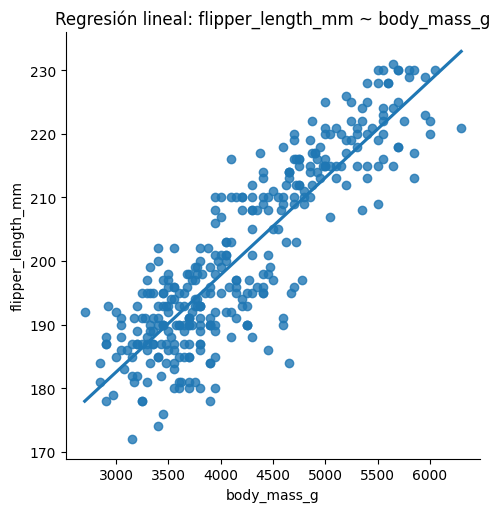

                                   RESULTADOS DE REGRESIÓN LINEAL                                   
Variable Dependiente: flipper_length_mm
Variables Independientes: body_mass_g
Motor: statsmodels
Fecha: 2026-01-18 15:40:13
----------------------------------------------------------------------------------------------------

INFORMACIÓN DEL MODELO:
----------------------------------------------------------------------------------------------------
Estadístico                                                       Valor
----------------------------------------------------------------------------------------------------
R-cuadrado                                                     0.758993
R-cuadrado Ajustado                                            0.758284
Estadístico F                                               1070.744592
Prob (F-estadístico)                                      4.370681e-107
AIC                                                         2295.035095
BIC            

In [ ]:
# Linear Regression
ds = DescriptiveStats(load_penguins())
ds.linear_regression(
    X = "body_mass_g", 
    y = "flipper_length_mm",
    show_plot = True
    )

In [ ]:
# If you need help
from statslibx.descriptive import DescriptiveStats as ds
from statslibx.datasets import load_penguins   
ds(load_penguins()).help()


╔════════════════════════════════════════════════════════════════════════════╗
║                    📊 CLASE DescriptiveStats - AYUDA COMPLETA              ║
╚════════════════════════════════════════════════════════════════════════════╝

📝 DESCRIPCIÓN:
   Clase para análisis estadístico descriptivo univariado y multivariado.
   Proporciona herramientas para análisis exploratorio de datos, medidas de
   tendencia central, dispersión, forma de distribución y regresión lineal.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 MÉTODOS PRINCIPALES:

┌────────────────────────────────────────────────────────────────────────────┐
│ 1. 📊 ESTADÍSTICAS UNIVARIADAS                                             │
└────────────────────────────────────────────────────────────────────────────┘

  🔹 Medidas de Tendencia Central:
     • .mean(column=None)              → Media aritmética
     • .median(column=None)            → Mediana (valor central)
     • .mode(column=None) 

## StatsLibX. Inferential

In [1]:
from statslibx import InferentialStats
from statslibx.datasets import load_penguins

In [2]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Create a InferentialStats Object
infer = InferentialStats(df)

In [4]:
# Confidence Interval + Point Estimate
infer.confidence_interval(
    column="bill_length_mm",
    statistic="mean"
)

(np.float64(43.34124734665466),
 np.float64(44.502612302468144),
 np.float64(43.9219298245614))

In [5]:
# t test 1 sample
# We use for this example 40 mm, you could prove with 44 :)
# Null Hypothesis:          mean < 40
# Alternative Hyphotesis:   mean > 40
infer.t_test_1sample(
    column="bill_length_mm",
    popmean=40,
    alternative="greater"
)
# With alternative, we configure 
# the alternative hypothesis

                         T-Test de Una Muestra (Media)                          
Fecha: 2026-01-18 20:28:45
Hipótesis Alternativa: greater
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         13.284749
Valor p                                          4.791970e-33

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
popmean                                                    40
sample_mean                                  43.9219298245614
n                                                         342
df                                                        341

In [6]:
# t test 2 sample
# Null Hyphothesis: Mean of both sample are equal
# Alternative Hyphothesis: Mean of both sample 
# are not equal
# Null Hyphothesis: Mean1 > Mean2
# Alternative Hyphothesis: Mean1 < Mean2

infer.t_test_2sample(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    alternative="less"
)

                             T-Test de Dos Muestras                             
Fecha: 2026-01-18 20:28:45
Hipótesis Alternativa: less
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         85.273599
Valor p                                          1.000000e+00

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
✔️ No hay evidencia suficiente para rechazar la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
mean1                                        43.9219298245614
mean2                                      17.151169590643278
std1                                       5.4595837139265315
std2                                       1.9747931568167814
n1                                               

In [7]:
# t test paired
# u = mean difference
# Null Hyphothesis: u1 - u2 > 0
# Alternative Hyphothesis: u1 - u2 < 0

infer.t_test_paired(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    alternative="less"
)

                                 T-Test Pareado                                 
Fecha: 2026-01-18 20:28:45
Hipótesis Alternativa: less
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         79.505286
Valor p                                          1.000000e+00

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
✔️ No hay evidencia suficiente para rechazar la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
mean_diff                                  26.770760233918125
n                                                         342

In [8]:
# Mann Whitney Test
# Null Hyphothesis: Values1 > Values2
# Alternative Hyphothesis: Values1 < Values2

infer.mann_whitney_test(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    alternative="less"
)

                              Mann-Whitney U Test                               
Fecha: 2026-01-18 20:28:45
Hipótesis Alternativa: less
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                     116964.000000
Valor p                                          1.000000e+00

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
✔️ No hay evidencia suficiente para rechazar la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
median1                                                 44.45
median2                                                  17.3
n1                                                        342
n2                                                        342

In [9]:
infer.data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [10]:
# t test paired
# Null Hyphothesis: Values1 and Values2 are independent
# Alternative Hyphothesis: Values1 and Values2 are not independent
infer.chi_square_test(
    column1="bill_length_mm",
    column2="bill_depth_mm"
).interpretation


'Se RECHAZA la hipótesis alternativa'

In [11]:
# t test paired
# Null Hyphothesis: Values1 and Values2 are independent
# Alternative Hyphothesis: Values1 and Values2 are not independent
infer.chi_square_test(
    column1="flipper_length_mm",
    column2="body_mass_g"
).interpretation

'Se RECHAZA la hipótesis nula'

In [12]:
# Anova Test
# Null Hypothesis: All population means are equal
# Alternative Hypothesis: At least one average is different
infer.anova_oneway(
    column="bill_length_mm",
    groups="species"
)

                               ANOVA de Un Factor                               
Fecha: 2026-01-18 20:28:45
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                        410.600255
Valor p                                          2.694614e-91

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
groups                                                      3
n_total                                                   342

In [13]:
# Kruskal-Wallis Test
# Null Hypothesis: All groups come from the same distribution
# Alternative Hypothesis: At least one group differs
infer.kruskal_wallis_test(
    column="bill_length_mm",
    groups="species"
)

                              Kruskal-Wallis Test                               
Fecha: 2026-01-18 20:28:45
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                        244.136718
Valor p                                          9.691372e-54

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
groups                                                      3
n_total                                                   342

In [14]:
# Normality Test
# Null Hypothesis: Data are normal
# Alternative Hypothesis: Data are not normal
infer.normality_test(
    column="bill_length_mm",
    method="shapiro",
    test_statistic="mean"
)

                              Shapiro-Wilk (mean)                               
Fecha: 2026-01-18 20:28:45
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                          0.974855
Valor p                                          1.119730e-05

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
n                                                         342
test_statistic                                           mean
loc                                          43.9219298245614
scale                                      5.4595837139265315

In [16]:
# Normality Test
# Null Hypothesis: Data are normal
# Alternative Hypothesis: Data are not normal
infer.hypothesis_test(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    method="difference_mean",
    homoscedasticity="var_test"
)


                               Two-sample t-test                                

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                         85.273599
Valor p                             5.194979e-271

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

TEST DE HOMOCEDASTICIDAD:
--------------------------------------------------------------------------------
Método: var_test
Estadístico: 7.643211
Valor p: 2.220446e-16
❌ No se asume igualdad de varianzas
